# 7. Hafta Lab-4: Yapay Sinir Ağları
## BGM 565: Siber Güvenlik için Makine Öğrenme Yöntemleri
## İstanbul Şehir Üni. - Bilgi Güvenliği Müh.
### Dr. Ferhat Özgür Çatak

In [1]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist
import numpy as np
from IPython.display import Image

c:\users\user\appdata\local\programs\python\python35\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Embedding, Input
from keras.utils import plot_model
from keras import regularizers

### Mnist veri kümesi

In [3]:
(x_train, _), (x_test, _) = mnist.load_data()

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


### Autoencoder model

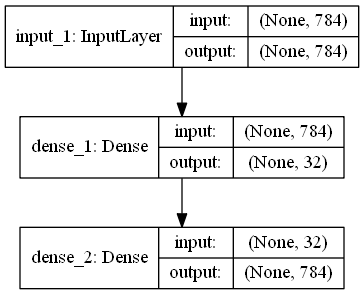

In [6]:
input_img = Input(shape=(x_train.shape[1],)) # 784
encoded = Dense(32, activation='relu')(input_img)
decoded = Dense(x_train.shape[1], activation='sigmoid')(encoded)
autoencoder = Model(input_img, decoded)
plot_model(autoencoder, show_shapes=True, to_file="ae.png")
Image("ae.png")

### Autoencoder modelini compile edelim

In [7]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

### Modeli eğitelim

In [8]:
history = autoencoder.fit(x_train, x_train, epochs=10, batch_size=256, validation_data=(x_test, x_test), verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 10s 164us/step - loss: 0.3547 - val_loss: 0.2710
Epoch 2/10
60000/60000 [==============================] - 12s 197us/step - loss: 0.2640 - val_loss: 0.2530
Epoch 3/10
60000/60000 [==============================] - 9s 151us/step - loss: 0.2417 - val_loss: 0.2286
Epoch 4/10
60000/60000 [==============================] - 9s 142us/step - loss: 0.2214 - val_loss: 0.2120
Epoch 5/10
60000/60000 [==============================] - 9s 146us/step - loss: 0.2070 - val_loss: 0.1995
Epoch 6/10
60000/60000 [==============================] - 10s 167us/step - loss: 0.1962 - val_loss: 0.1901
Epoch 7/10
60000/60000 [==============================] - 11s 176us/step - loss: 0.1877 - val_loss: 0.1825
Epoch 8/10
60000/60000 [==============================] - 11s 185us/step - loss: 0.1807 - val_loss: 0.1761
Epoch 9/10
60000/60000 [==============================] - 11s 190us/step - loss: 0.1747 - val_los

### Modeli kullanarak girdi veri kümesini oluşturalım.

In [9]:
decoded_imgs = autoencoder.predict(x_test)
decoded_imgs.shape

(10000, 784)

### Decode edilmiş resimleri gösterelim.

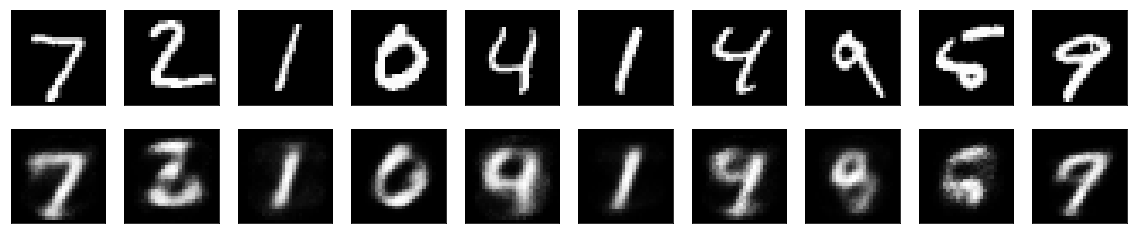

In [13]:
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.savefig("digits.png")
plt.show()

### Kayıp fonksiyonunun değişimi

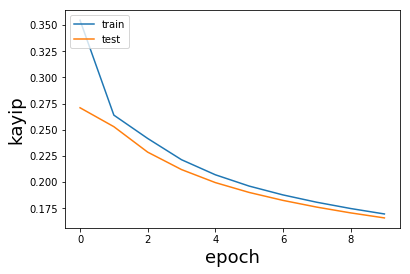

In [11]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.ylabel('kayip', fontsize=18)
plt.xlabel('epoch', fontsize=18)
plt.legend(['train', 'test'], loc='upper left')

plt.show()

## Sparse Autoencoder

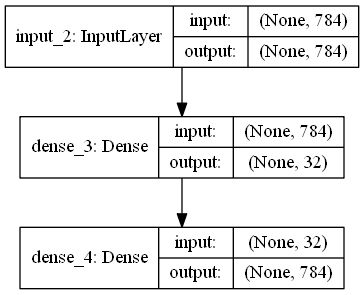

In [12]:
input_img = Input(shape=(x_train.shape[1],)) # 784
# add a Dense layer with a L1 activity regularizer
encoded = Dense(32, activation='relu',
                activity_regularizer=regularizers.l1(10e-5))(input_img)
decoded = Dense(x_train.shape[1], activation='sigmoid')(encoded)

autoencoder = Model(input_img, decoded)
plot_model(autoencoder, show_shapes=True, to_file="ae-sparse.png")
Image("ae-sparse.png")

In [13]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [14]:
history = autoencoder.fit(x_train, x_train, epochs=20, batch_size=256, validation_data=(x_test, x_test), verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 20s 337us/step - loss: 0.6729 - val_loss: 0.6485
Epoch 2/20
60000/60000 [==============================] - 16s 262us/step - loss: 0.6284 - val_loss: 0.6090
Epoch 3/20
60000/60000 [==============================] - 18s 296us/step - loss: 0.5916 - val_loss: 0.5749
Epoch 4/20
60000/60000 [==============================] - 23s 384us/step - loss: 0.5598 - val_loss: 0.5454
Epoch 5/20
60000/60000 [==============================] - 29s 486us/step - loss: 0.5323 - val_loss: 0.5198
Epoch 6/20
60000/60000 [==============================] - 29s 486us/step - loss: 0.5084 - val_loss: 0.4975
Epoch 7/20
60000/60000 [==============================] - 29s 491us/step - loss: 0.4875 - val_loss: 0.4780
Epoch 8/20
60000/60000 [==============================] - 30s 494us/step - loss: 0.4692 - val_loss: 0.4609
Epoch 9/20
60000/60000 [==============================] - 28s 465us/step - loss: 0.4531 - val_

### Modeli kullanarak girdi veri kümesini oluşturalım.

In [15]:
decoded_imgs = autoencoder.predict(x_test)

### Decode edilmiş resimleri gösterelim.

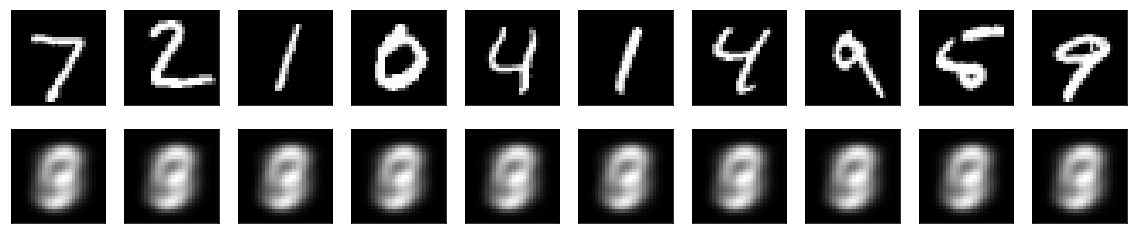

In [16]:
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
#plt.savefig("digits.png")
plt.show()

### Kayıp fonksiyonunun değişimi

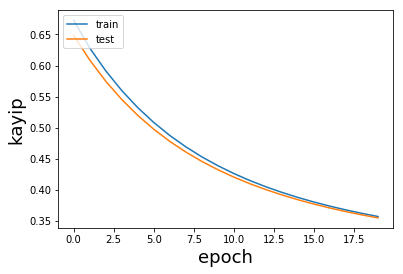

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.ylabel('kayip', fontsize=18)
plt.xlabel('epoch', fontsize=18)
plt.legend(['train', 'test'], loc='upper left')

plt.show()

## Deep AutoEncoder Model

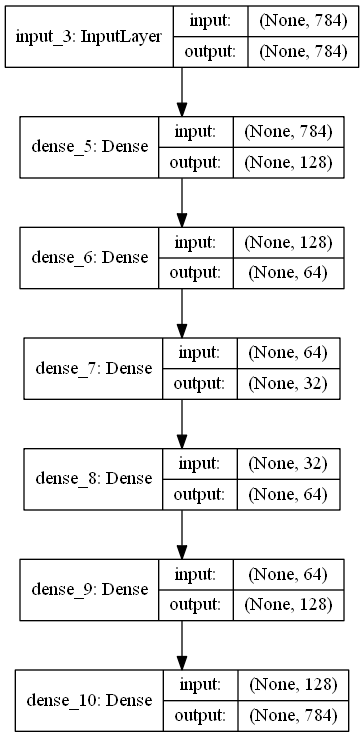

In [18]:
input_img = Input(shape=(x_train.shape[1],))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(x_train.shape[1], activation='sigmoid')(decoded)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

plot_model(autoencoder, show_shapes=True, to_file="ae-deep.png")
Image("ae-deep.png")

### Modeli eğitelim

In [19]:
history = autoencoder.fit(x_train, x_train, epochs=30, batch_size=256, validation_data=(x_test, x_test), verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 50s 832us/step - loss: 0.3450 - val_loss: 0.2635
Epoch 2/30
60000/60000 [==============================] - 38s 630us/step - loss: 0.2574 - val_loss: 0.2494
Epoch 3/30
60000/60000 [==============================] - 35s 586us/step - loss: 0.2421 - val_loss: 0.2348
Epoch 4/30
60000/60000 [==============================] - 37s 612us/step - loss: 0.2258 - val_loss: 0.2144
Epoch 5/30
60000/60000 [==============================] - 32s 529us/step - loss: 0.2105 - val_loss: 0.2040
Epoch 6/30
60000/60000 [==============================] - 29s 475us/step - loss: 0.2008 - val_loss: 0.1947
Epoch 7/30
60000/60000 [==============================] - 20s 334us/step - loss: 0.1899 - val_loss: 0.1836
Epoch 8/30
60000/60000 [==============================] - 18s 304us/step - loss: 0.1810 - val_loss: 0.1789
Epoch 9/30
60000/60000 [==============================] - 19s 321us/step - loss: 0.1750 - val_

### Modeli kullanarak girdi veri kümesini oluşturalım.

In [20]:
decoded_imgs = autoencoder.predict(x_test)

### Decode edilmiş resimleri gösterelim.

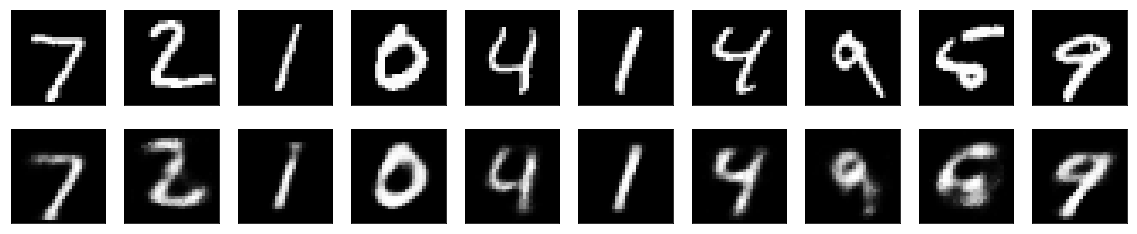

In [21]:
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
#plt.savefig("digits.png")
plt.show()